# Implementing the Second Method of the R(5, 5) Paper

Here is an outline of an implementation for the algorithm outlined in page 8 of the R(5, 5) paper. I've broken it up into individual pieces which may be attacked by different researchers. 

## First, methods for enumerating (r, s, t)-cliques and (r, s, t)-independent sets. 

Recall for (r, s, t)-cliques, we have (r, s, t) is either (1, 2, 2), (0, 2, 3) or (0, 3, 2).

In [27]:
import itertools
# Description: Defintion on page 6
# Input: G, a (first pointed graph we are gluing) and H, b (second pointed graph we are glueing)
# K is the shared neighborhood of a and b in both graphs (K is in R(3,5,d)). Note that for this method, we assume
# K's vertices when found in G and H will have the same labels in all 3 graphs.
# Output: A list of all the (r, s, t) cliques. 


def get_rst_cliques(G, a, H, b, K):
    #Contains 3-tuples of the form (w_tuple, x_tuple, y_tuple)
    rst_cliques = []
    VK = K.vertices()
    print(VK)
    print((set(G.vertices()) - set(VK)))
    xs = (set(G.vertices()) - set(VK)).remove(a)
    print(xs)
    ys = (set(H.vertices()) - set(VK)).remove(b)

    #(1,2,2) case
    for w in VK:
        #contains 2-tuples that form 3-cliques with w in G
        x_1_2_cliques = []
        #contains 2-tuples that form 3-cliques with w in H
        y_1_2_cliques = []

        for pair in itertools.combinations(xs,2):
            if G.is_clique([w, pair[0], pair[1]]):
                x_1_2_cliques.append(pair)
        for pair in itertools.combinations(ys,2):
            if H.is_clique([w, pair[0], pair[1]]):
                y_1_2_cliques.append(pair)

        for pair1 in x_1_2_cliques:
            for pair2 in y_1_2_cliques:
                rst_cliques.append( ( (w,), pair1, pair2 ) )

    #(0,2,3) case
    #can simplify this part to just look for edges
    x_0_2_cliques = []
    y_0_3_cliques = []
    for pair in itertools.combinations(xs,2):
        if G.is_clique([pair[0], pair[1]]):
            x_0_2_cliques.append(pair)
    for pair in itertools.combinations(ys,3):
        if H.is_clique([pair[0], pair[1], pair[2]]):
            y_0_3_cliques.append(pair)

    for pair1 in x_0_2_cliques:
            for pair2 in y_0_3_cliques:
                rst_cliques.append( ( (), pair1, pair2 ) )
    
    #(0,3,2) case
    x_0_3_cliques = []
    y_0_2_cliques = []
    for pair in itertools.combinations(xs,3):
        if G.is_clique([pair[0], pair[1], pair[2]]):
            x_0_3_cliques.append(pair)
    for pair in itertools.combinations(ys,2):
        if H.is_clique([pair[0], pair[1]]):
            y_0_2_cliques.append(pair)

    for pair1 in x_0_3_cliques:
            for pair2 in y_0_2_cliques:
                rst_cliques.append( ( (), pair1, pair2 ) )

    return rst_cliques

Here is an example usage of the above function

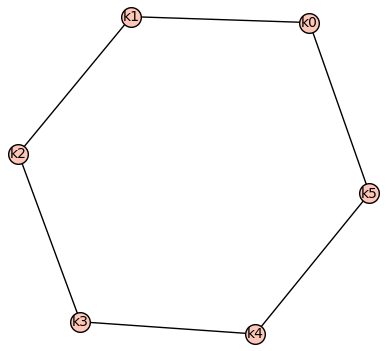

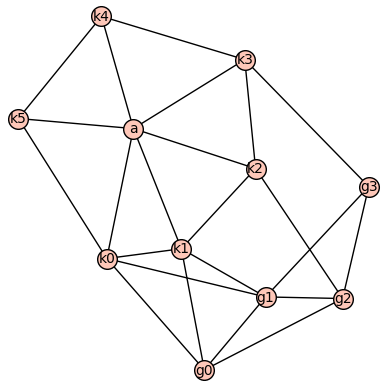

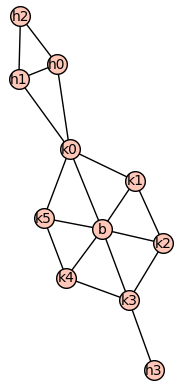

None


TypeError: 'NoneType' object is not iterable

In [28]:
#Sample Test Execution
K = graphs.EmptyGraph()
for i in range(6):
    vertex_label = "k" + str(i)
    K.add_vertex(vertex_label)
for i in range(6):
    K.add_edge("k"+str(i), "k"+str((i+1)%6))
K.show()

G = K.copy()
G.add_vertex("a")
G.add_vertices(["g0", "g1", "g2", "g3"])
G.add_edges([("a", x) for x in K.vertices()])
for i in range(3):
    G.add_edge("g"+str(i), "g"+str((i+1)))
for i in range(4):
    G.add_edge("g"+str(i), "k"+str((i)))
G.add_edges([("k0","g1"), ("k1","g0"), ("g0","g2"), ("g1","g3")])
G.show()

H = K.copy()
H.add_vertex("b")
H.add_vertices(["h0", "h1", "h2", "h3"])
H.add_edges([("b", x) for x in K.vertices()])
H.add_edges([("k0", "h0"), ("k0", "h1"), ("h0", "h1"), ("h0", "h2"), ("h1", "h2"), ("k3", "h3")])
H.show()

get_rst_cliques(G, "a", H, "b", K)

Recall for (r, s, t)-independent sets, we have (r, s, t) is either r (3, 1, 1), (2, 1, 2), (2, 2, 1), (1, 1, 3), (1, 2, 2), (1, 3, 1), (0, 2, 3) or (0, 3, 2).

In [ ]:
# Description: Defintion on page 6
# Input: G, a (first pointed graph we are gluing) and H, b (second pointed graph we are glueing)
# Output: A list of all the (r, s, t) independent sets. 
def get_rst_independent_sets(G, a, H, b):
    rst_IS = []
    
    # Implement method here. 
    
    return rst_IS

# Second, a method that turns constraints on M into a SAT instance.  

A very popular question in computer science is the *SATisfiability problem* which asks: how do you determine if a boolean formula (on n boolean variables) has an assignment of the variables that makes the formula true. Our formulas tend to be of the following form 

(x_1 OR x_2 OR ... x_k) AND (y_1 OR y_2 OR ... y_k) AND ... AND (z_1 OR z_2 OR ... OR z_k)

It turns out SAT is an NP hard problem! But SAT solving is such a common instance in computer science, there's a whole host of results and algorithms on it. 

We have a bunch of 0, 1 variables in a matrix M which needs to satisfy certain constraints (dictated by the rst cliques and indpendent sets). This is an excerpt from the paper: 

` Each entry m_ij of M is a variable, with value FALSE, TRUE or UNKNOWN, while each set {x1, . . . , xs} × {y1, . . . , yt} is a clause. Clauses from potential (r, s, t)-cliques can’t have all their variables TRUE, while clauses from potential independent (r, s, t)-sets can’t have all their variables FALSE.`
 
In other words, each rst clique / independent set exactly corresponds to a clause in our SAT formula! So, finding all the possible matrices M amounts to finding all the satisfying assignments of a certain formula. 

In [ ]:
# Description: Takes two pointed graphs and creates a SAT formula encoding the constraints a glueing defined by M must satisfy. 
# Input: Two pointed graphs (variables names according to notation in paper)
# Output: *Undecided* A list of clauses?
def create_SAT_formula(G, a, H, b):
    rst_cliques = get_rst_cliques(G, a, H, b)
    rst_IS = get_rst_independent_sets(G, a, H, b)
    
    clauses = []
    
    # Implement method here. 
    
    return clauses

Once we have the SAT formula, we have to find all the satisfying assignments! Is there a Sage method which will just do this for us? Most likely (there are many SAT solvers out there). 

In [ ]:
def get_SAT_assignments(formula):
    assignments = []
    
    # Implement method here.
    
    return assignemnts 

## Step three: Return the gluing based on the solutions generated above. 

In [ ]:
# Description: We will use a matrix M to glue two pointed graphs together. 
# Input: Two pointed graphs (G, a) and (H, b) as well as a d' x d' matrix M. 
# Output: A graph, based on glueing along M. 
def glue(G, a, H, b, M): 
    glued_graph = Graph()
    
    return glued_graph